In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("loan.csv")
df=data.copy()
df.head(5)
#loan = borç - kredi
#dependents = bağımlı olduğu kişi sayısı
#self_Employed = çalışıyor mu 
#coapllicationIncome = eşinin geliri 
#credit_history = eski krediyi ödemiş mi
#property_area = mülkü nerede

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [6]:
df["Gender"].unique()

array(['Male', 'Female', nan], dtype=object)

In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [9]:
df = df.dropna()

In [10]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Label Encoding
1. sklearn.preprocessing.LabelEncoder
2. le = LabelEncoder()
3. df[columns] = le.fit_transform(df[columns])
     - replace ile yapacagız


In [11]:
#Loan_Status
df.replace({"Loan_Status" : {"N":0, "Y":1}} , inplace=True)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [12]:
#dependents columns
df["Dependents"].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [13]:
#+3 = 4 yapalım
df = df.replace(to_replace="3+" ,value=4)

In [14]:
df["Dependents"].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

<AxesSubplot:xlabel='Education', ylabel='count'>

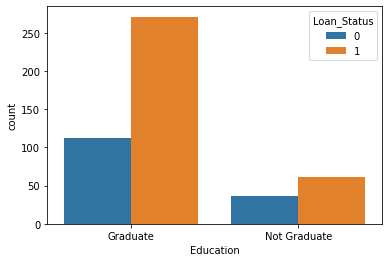

In [15]:
#education & loan status
sns.countplot(x="Education" , hue="Loan_Status" , data=df)

<AxesSubplot:xlabel='Married', ylabel='count'>

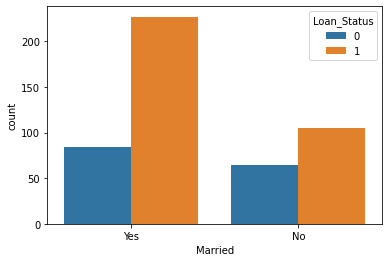

In [16]:
sns.countplot(x="Married" ,hue="Loan_Status" , data=df )

<AxesSubplot:xlabel='Gender', ylabel='count'>

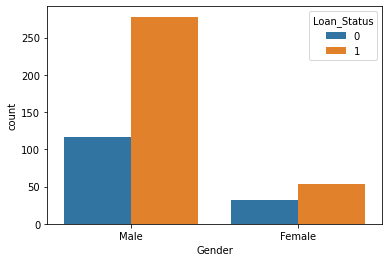

In [17]:
sns.countplot(x="Gender" ,hue="Loan_Status" , data=df )

<AxesSubplot:xlabel='Dependents', ylabel='count'>

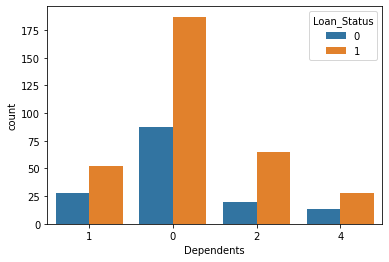

In [18]:
sns.countplot(x="Dependents" ,hue="Loan_Status" , data=df )

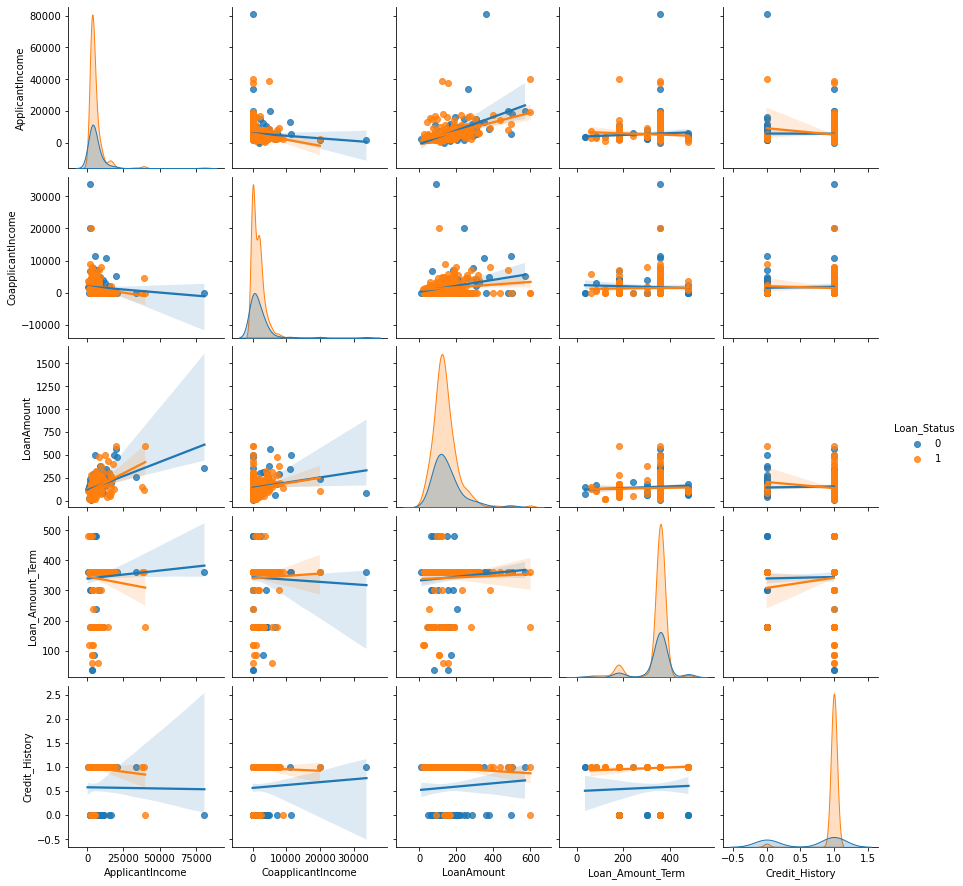

In [19]:
sns.pairplot(data=df , hue="Loan_Status" ,kind="reg")

In [20]:
df["Property_Area"].value_counts()

Semiurban    191
Urban        150
Rural        139
Name: Property_Area, dtype: int64

Categorical -> Numeric

In [21]:
df.replace({"Married":{"No":0 , "Yes":1},
            "Gender" :{"Male":1,"Female" :0},
            "Self_Employed":{"No":0 , "Yes":1},
             "Property_Area":{"Rural":0,"Urban":1 , "Semiurban" :2},
           "Education":{"Graduate":1 , "Not Graduate":0}} , inplace=True)

In [22]:
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    int64  
 2   Married            480 non-null    int64  
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    int64  
 5   Self_Employed      480 non-null    int64  
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    int64  
 12  Loan_Status        480 non-null    int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 68.7+ KB


In [24]:
df = df.astype({'Dependents':'float','Property_Area':'float'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    int64  
 2   Married            480 non-null    int64  
 3   Dependents         480 non-null    float64
 4   Education          480 non-null    int64  
 5   Self_Employed      480 non-null    int64  
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    float64
 12  Loan_Status        480 non-null    int64  
dtypes: float64(6), int64(6), object(1)
memory usage: 68.7+ KB


In [25]:
X=df.drop(columns=["Loan_Status" ,"Loan_ID"],axis=1)
Y=df["Loan_Status"]

In [26]:
X.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1.0,1,0,4583,1508.0,128.0,360.0,1.0,0.0
2,1,1,0.0,1,1,3000,0.0,66.0,360.0,1.0,1.0


In [27]:
Y.head(2)

1    0
2    1
Name: Loan_Status, dtype: int64

### Model Training

In [28]:
#train_test_split
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,Y , test_size=0.1,stratify=Y, random_state=2)

In [29]:
#logistic regression
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression(solver='lbfgs', max_iter=1000)
logReg.fit(X_train , y_train)

LogisticRegression(max_iter=1000)

In [32]:
#SVM rbf
from sklearn.svm import SVC
svc_rbf = SVC(kernel ="rbf" )
svc_rbf.fit(X_train, y_train)

SVC()

In [33]:
#SVM linear
from sklearn.svm import SVC
svc_lineer = SVC(kernel ="linear")
svc_lineer.fit(X_train, y_train)

SVC(kernel='linear')

### Model Evulation

In [36]:
#model eğitirken ne kadar doğru yaptık
y_pred_train_logReg = logReg.predict(X_train)
y_pred_train_svmR = svc_rbf.predict(X_train)
y_pred_train_svmL = svc_lineer.predict(X_train)

#modele test verisi sokunca ne kadar doğru yaptık
y_pred_test_logReg = logReg.predict(X_test)
y_pred_test_svmR = svc_rbf.predict(X_test)
y_pred_test_svmL = svc_lineer.predict(X_test)

#calculate accuracy
from sklearn.metrics import accuracy_score
print("training data prediction")
print("accuracy logreg train pred :" , accuracy_score(y_pred_train_logReg , y_train))
print("accuracy svmR train pred :" ,accuracy_score(y_pred_train_svmR , y_train))
print("accuracy svmL train pred :",accuracy_score(y_pred_train_svmL , y_train))
print("**************************")
print("test data prediction")
print("accuracy logreg test pred :" , accuracy_score(y_pred_test_logReg , y_test))
print("accuracy svmR test pred :",accuracy_score(y_pred_test_svmR , y_test))
print("accuracy svmL test pred :",accuracy_score(y_pred_test_svmL , y_test))


training data prediction
accuracy logreg train pred : 0.8078703703703703
accuracy svmR train pred : 0.7013888888888888
accuracy svmL train pred : 0.7708333333333334
**************************
test data prediction
accuracy logreg test pred : 0.8333333333333334
accuracy svmR test pred : 0.6875
accuracy svmL test pred : 0.8125


In [37]:
#logistic regresyon bizim için iyi bir model diyebiliriz.
#f1, recall , confusion matrix ... look